<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.080331,99.402459,66.286824,64.289181,-1168.428806,-883.370011,82.084404,-965.454415
1,0.0,1.0,72.528089,95.922729,64.716495,71.085518,742.626508,1056.879338,15.560497,1041.318842
2,0.0,2.0,98.912302,73.797959,60.145561,59.379538,266.037021,568.272382,-85.822824,654.095205
3,0.0,3.0,89.630081,44.895999,40.178007,35.576880,-195.749575,24.531392,-53.688261,78.219653
4,0.0,4.0,91.415813,20.542344,30.812666,53.930094,50.588047,257.288965,136.321737,120.967227
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.904366,26.043542,24.708628,68.759546,-101.389347,89.026735,67.277729,21.749006
59996,999.0,56.0,84.022228,54.071100,52.035057,31.208967,-33.219251,198.118101,225.501561,-27.383460
59997,999.0,57.0,44.660093,58.010544,67.799626,89.724229,-150.640333,119.554159,197.891192,-78.337033
59998,999.0,58.0,78.713332,67.562953,75.437879,39.227896,305.277170,576.219230,301.667702,274.551528


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.080331,99.402459,66.286824,64.289181,-1168.428806,-883.370011,82.084404,-965.454415
1,0.0,1.0,72.528089,95.922729,64.716495,71.085518,742.626508,1056.879338,15.560497,1041.318842
2,0.0,2.0,98.912302,73.797959,60.145561,59.379538,266.037021,568.272382,-85.822824,654.095205
3,0.0,3.0,89.630081,44.895999,40.178007,35.576880,-195.749575,24.531392,-53.688261,78.219653
4,0.0,4.0,91.415813,20.542344,30.812666,53.930094,50.588047,257.288965,136.321737,120.967227
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.904366,26.043542,24.708628,68.759546,-101.389347,89.026735,67.277729,21.749006
59996,999.0,56.0,84.022228,54.071100,52.035057,31.208967,-33.219251,198.118101,225.501561,-27.383460
59997,999.0,57.0,44.660093,58.010544,67.799626,89.724229,-150.640333,119.554159,197.891192,-78.337033
59998,999.0,58.0,78.713332,67.562953,75.437879,39.227896,305.277170,576.219230,301.667702,274.551528


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

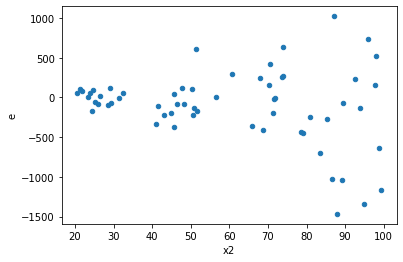

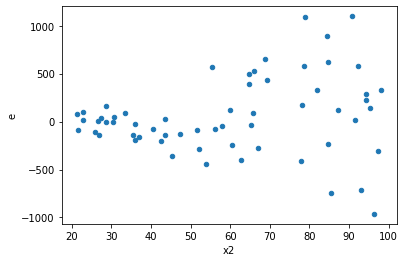

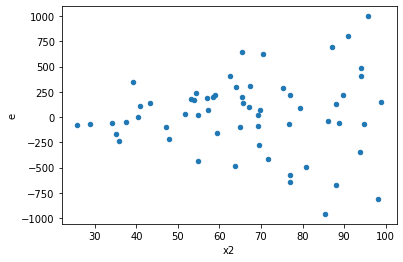

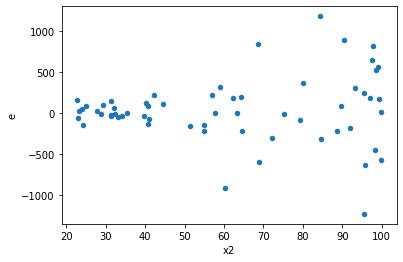

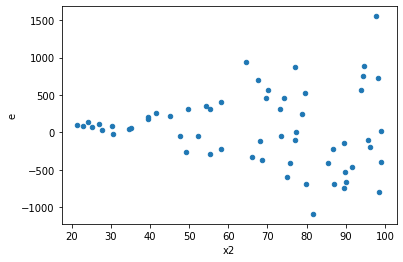

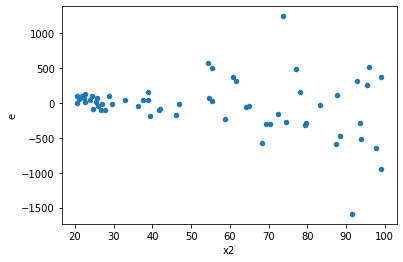

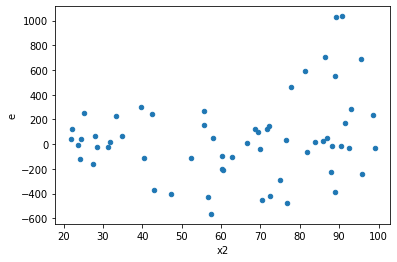

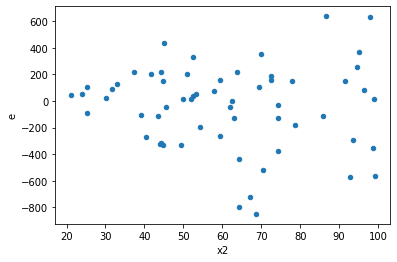

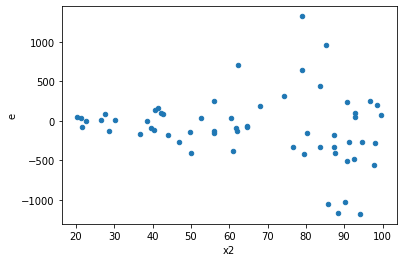

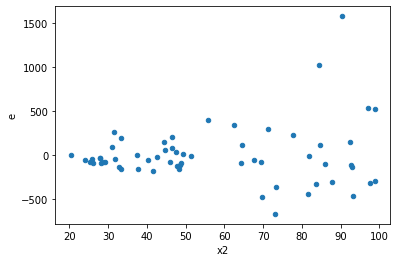

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,28.0,24.0,3339713.669511012,4200713.776401756,119275.48819682185,175029.7406834065,1.4674409916862554,0.34320193701962043,0.8283990314901898,0.17160096850981021,Reject005=1 : Homoscedasticity
3.0,28.0,24.0,1147057.9447925098,6976430.22086819,40966.35517116106,290684.5925361746,7.095690874173906,6.582421826939466e-06,0.9999967087890865,3.291210913469733e-06,Reject005=0 : Heteroscedasticity
6.0,27.0,25.0,1481838.822324203,3778856.6231116317,54882.91934534086,151154.26492446527,2.7541221700207736,0.012959892590258981,0.9935200537048705,0.006479946295129491,Reject005=0 : Heteroscedasticity
9.0,27.0,25.0,330516.62853726756,5141313.409947188,12241.35661249139,205652.5363978875,16.799815813554066,5.387406076806656e-10,0.9999999997306297,2.693703038403328e-10,Reject005=0 : Heteroscedasticity
10.0,29.0,23.0,1962529.356694153,3079569.5815933635,67673.42609290183,133894.32963449406,1.9785362935620314,0.09711017144203282,0.9514449142789836,0.04855508572101641,Reject005=1 : Homoscedasticity
12.0,22.0,30.0,2071501.9522600768,3141948.0849400978,94159.17964818531,104731.6028313366,1.11228244789997,0.7744071649900859,0.6127964175049571,0.38720358249504294,Reject005=1 : Homoscedasticity
13.0,25.0,27.0,3784416.71286466,4949514.579854322,151376.6685145864,183315.3548094193,1.2109881701601548,0.6253195401706768,0.6873402299146616,0.3126597700853384,Reject005=1 : Homoscedasticity
19.0,27.0,25.0,2596734.2278751507,4291778.067614789,96175.34177315373,171671.12270459157,1.7849806357798839,0.1493735609754412,0.9253132195122794,0.0746867804877206,Reject005=1 : Homoscedasticity
20.0,30.0,22.0,3795261.3239970477,2958529.7724483926,126508.71079990159,134478.6260203815,1.062998944263102,0.8952224228129271,0.5523887885935365,0.44761121140646354,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,25.0,27.0,7703755.884366813,1144163.5199317215,308150.2353746725,42376.426664137834,0.13751872236155638,3.883884067801878e-06,Reject005=0 : Heteroscedasticity
1.0,31.0,21.0,6112846.29058859,1178908.2411163326,197188.59001898678,56138.48767220631,0.2846944017744682,0.0015554039705124522,Reject005=0 : Heteroscedasticity
2.0,28.0,24.0,3339713.669511012,4200713.776401756,119275.48819682185,175029.7406834065,1.4674409916862554,0.34320193701962043,Reject005=1 : Homoscedasticity
3.0,28.0,24.0,1147057.9447925098,6976430.22086819,40966.35517116106,290684.5925361746,7.095690874173906,6.582421826939466e-06,Reject005=0 : Heteroscedasticity
4.0,27.0,25.0,7040144.917817552,6405730.22947886,260746.10806731673,256229.20917915442,0.9826770227880212,0.9607937010727436,Reject005=1 : Homoscedasticity
5.0,19.0,33.0,4829936.951762323,1612621.1634874805,254207.2079874907,48867.30798446911,0.19223415563760815,0.0003770280861075375,Reject005=0 : Heteroscedasticity
6.0,27.0,25.0,1481838.822324203,3778856.6231116317,54882.91934534086,151154.26492446527,2.7541221700207736,0.012959892590258981,Reject005=0 : Heteroscedasticity
7.0,26.0,26.0,3890542.480645167,1652853.6995376176,149636.24925558336,63571.296136062214,0.42483887729289754,0.03315355484417199,Reject005=0 : Heteroscedasticity
8.0,28.0,24.0,8935603.479316602,859055.4013427806,319128.6956898786,35793.97505594919,0.11216156848124022,1.9639468323691019e-07,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      543
Reject005=0 : Heteroscedasticity    457
Name: Result_test, dtype: int64